In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1 : Simulated data

### Question 1 Data Generation

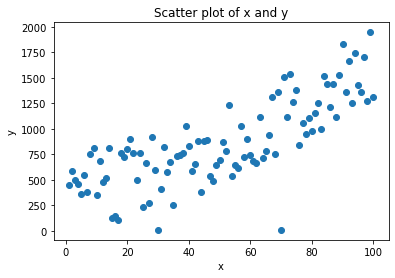

new point:  (30, 10.0)
new point:  (70, 10.0)


In [33]:
# Question 1
x = np.arange(1, 101)
epsilon = np.random.uniform(0, 800, size=(100,))
y = 0.1*x**2 + 3*x + 7 + epsilon
y[29] = 10
y[69] = 10
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')
plt.show()
print('new point: ', (x[29], y[29]))
print('new point: ', (x[69], y[69]))


### Question 2 Regression Analysis

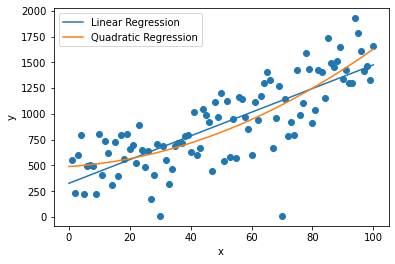

In [19]:
# Question 2
import sklearn.linear_model as lm

model = np.poly1d(np.polyfit(x, y, 1))
model2 = np.poly1d(np.polyfit(x, y, 2))

polyline = np.linspace(0, 100, 100)
plt.scatter(x, y)
plt.plot(polyline, model(polyline), label = 'Linear Regression')
plt.plot(polyline, model2(polyline), label = 'Quadratic Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [20]:
# Print R2 for linear regression
coefficients = np.polyfit(x, y, 1) 
linear_model = np.poly1d(coefficients)

y_pred = linear_model(x)

ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R^2 for linear regression: {r_squared}")

R^2 for linear regression: 0.6229326014095515


In [21]:
# R2 for quadratic regression
coefficients = np.polyfit(x, y, 2) 
quadratic_model = np.poly1d(coefficients)

y_pred = quadratic_model(x)
ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R^2 for quadratic regression: {r_squared}")

R^2 for quadratic regression: 0.651102416794038


### Question 3 Isolation Forest

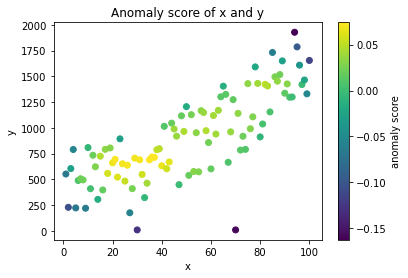

In [22]:
# Question 3 Isolation Forest 

from sklearn.ensemble import IsolationForest
df = pd.DataFrame({'x': x, 'y': y})
clf = IsolationForest(random_state=0).fit(df)

df['scores'] = clf.decision_function(df)

plt.scatter(df['x'], df['y'], c=df['scores'], cmap='viridis')
plt.colorbar(label='anomaly score')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Anomaly score of x and y')
plt.show()



Threshold: 0.05
Number of outliers 82
R^2 for linear regression: 0.7298
R^2 for quadratic regression: 0.8612


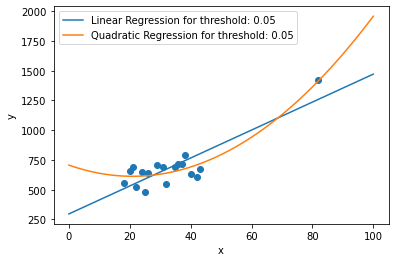

Threshold: 0.0278
Number of outliers 54
R^2 for linear regression: 0.7345
R^2 for quadratic regression: 0.791


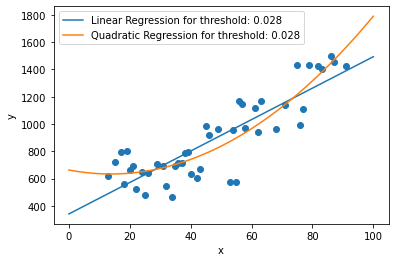

Threshold: 0.0056
Number of outliers 30
R^2 for linear regression: 0.6388
R^2 for quadratic regression: 0.662


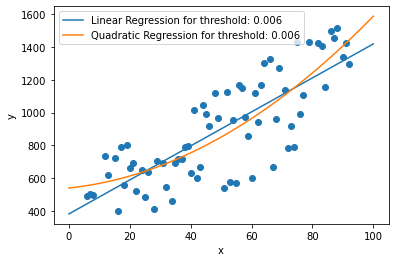

Threshold: -0.0167
Number of outliers 20
R^2 for linear regression: 0.6135
R^2 for quadratic regression: 0.6302


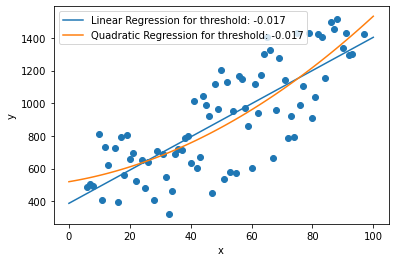

Threshold: -0.0389
Number of outliers 14
R^2 for linear regression: 0.6377
R^2 for quadratic regression: 0.6569


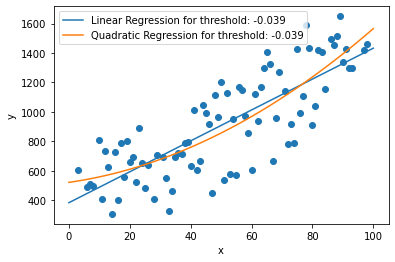

Threshold: -0.0611
Number of outliers 10
R^2 for linear regression: 0.6386
R^2 for quadratic regression: 0.6626


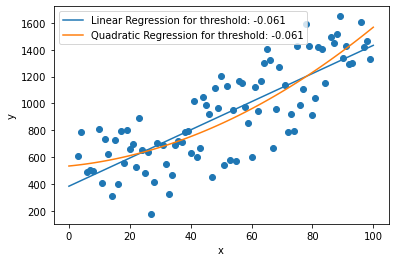

Threshold: -0.0833
Number of outliers 6
R^2 for linear regression: 0.6612
R^2 for quadratic regression: 0.6794


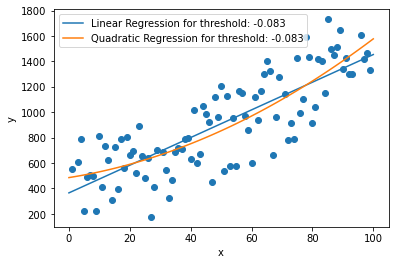

Threshold: -0.1056
Number of outliers 4
R^2 for linear regression: 0.6787
R^2 for quadratic regression: 0.6964


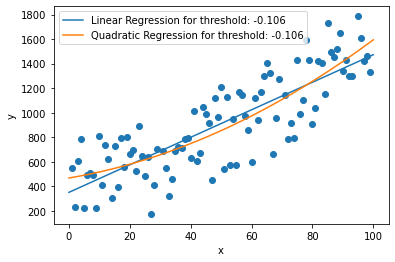

Threshold: -0.1278
Number of outliers 3
R^2 for linear regression: 0.6884
R^2 for quadratic regression: 0.7073


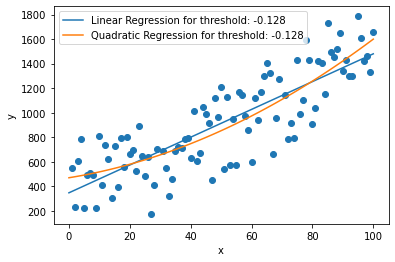

Threshold: -0.15
Number of outliers 2
R^2 for linear regression: 0.6758
R^2 for quadratic regression: 0.6963


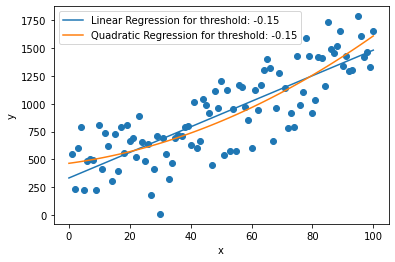

In [23]:
threshold = np.linspace(0.05, -0.15, 10)
for thesh in threshold:
    outliers = df[df['scores'] < thesh]
    print(f"Threshold: {np.round(thesh, 4)}")
    print('Number of outliers', len(outliers))

    new_df = df[df['scores'] >= thesh]
    # Reapply regression analysis
    new_x = new_df['x']
    new_y = new_df['y']

    new_model = np.poly1d(np.polyfit(new_x, new_y, 1)) # Linear regression
    new_model2 = np.poly1d(np.polyfit(new_x, new_y, 2)) # Quadratic regression

    # Compute R2 for both models

    coefficients = np.polyfit(new_x, new_y, 1) 
    linear_model = np.poly1d(coefficients)
    y_pred = linear_model(new_x)
    ss_res = np.sum((new_y - y_pred) ** 2)
    ss_tot = np.sum((new_y - np.mean(new_y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    print(f"R^2 for linear regression: {np.round(r_squared, 4)}")

    coefficients = np.polyfit(new_x, new_y, 2)
    quadratic_model = np.poly1d(coefficients)
    y_pred = quadratic_model(new_x)
    ss_res = np.sum((new_y - y_pred) ** 2)
    ss_tot = np.sum((new_y - np.mean(new_y)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    print(f"R^2 for quadratic regression: {np.round(r_squared, 4)}")


    #add fitted polynomial line to scatterplot
    polyline = np.linspace(0, 100, 100)
    plt.scatter(new_x, new_y)
    plt.plot(polyline, new_model(polyline), label = 'Linear Regression for threshold: ' + str(np.round(thesh, 3)))
    plt.plot(polyline, new_model2(polyline), label = 'Quadratic Regression for threshold: ' + str(np.round(thesh, 3)))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()



    # new_clf = IsolationForest(random_state=0).fit(new_df)
    # new_df['scores'] = new_clf.decision_function(new_df)

    # # Plot the anomaly score
    # plt.scatter(new_df['x'], new_df['y'], c=new_df['scores'], cmap='viridis')
    # plt.colorbar(label='anomaly score')
    # plt.xlabel('x')
    # plt.ylabel('y')
    # plt.show()
    

In [12]:
%pip install pyemd

### Question 4 Signal extraction and analysis

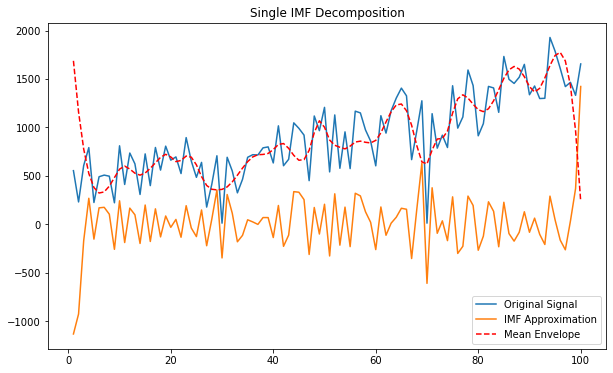

Original Data Regression:
Mean Squared Error: 66602.08715299511
R^2 Score: 0.6229326014095515
Slope: 11.491250612034818

Cleaned Data Regression:
Mean Squared Error: 84335.81286887047
R^2 Score: 0.03369366381285088
Slope: 1.8786032180283598


In [24]:
# Question 4 : Signal extraction and analysis
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)

def simple_emd(x, y):
    # Find local maxima and minima
    from scipy.signal import argrelextrema
    maxima = argrelextrema(y, np.greater)[0]
    minima = argrelextrema(y, np.less)[0]

    # Interpolating envelopes
    env_max = CubicSpline(x[maxima], y[maxima])
    env_min = CubicSpline(x[minima], y[minima])

    # Mean envelope and IMF approximation
    mean_env = (env_max(x) + env_min(x)) / 2
    imf = y - mean_env

    return imf, mean_env

# Decompose one IMF
imf, mean_env = simple_emd(x, y)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Signal')
plt.plot(x, imf, label='IMF Approximation')
plt.plot(x, mean_env, 'r--', label='Mean Envelope')
plt.legend()
plt.title("Single IMF Decomposition")
plt.show()

model_orig = LinearRegression().fit(x.reshape(-1, 1), y)
model_clean = LinearRegression().fit(x.reshape(-1, 1), imf)


y_pred_orig = model_orig.predict(x.reshape(-1, 1))
y_pred_clean = model_clean.predict(x.reshape(-1, 1))

mse_orig = mean_squared_error(y, y_pred_orig)
mse_clean = mean_squared_error(imf, y_pred_clean)
r2_orig = r2_score(y, y_pred_orig)
r2_clean = r2_score(imf, y_pred_clean)

print("Original Data Regression:")
print("Mean Squared Error:", mse_orig)
print("R^2 Score:", r2_orig)
print("Slope:", model_orig.coef_[0])

print("\nCleaned Data Regression:")
print("Mean Squared Error:", mse_clean)
print("R^2 Score:", r2_clean)
print("Slope:", model_clean.coef_[0])


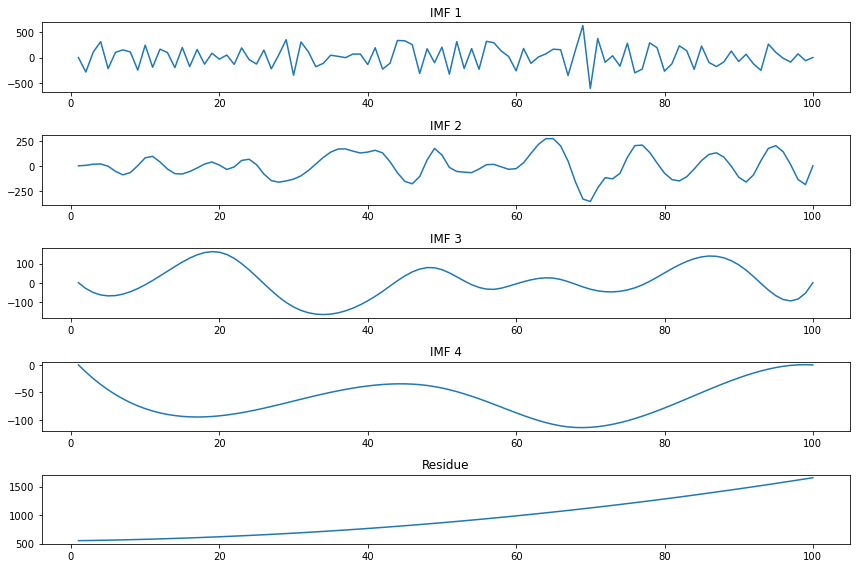

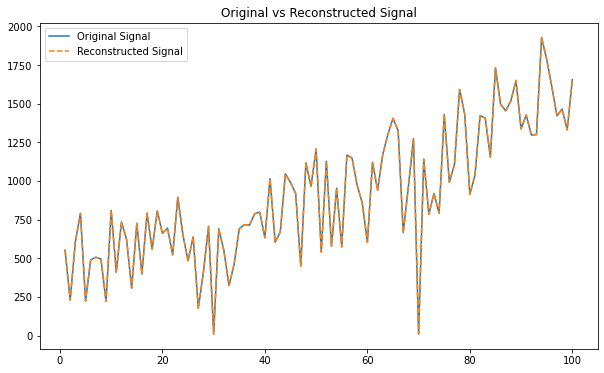

Mean Squared Error of Reconstruction: 1.6155871338926322e-29


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.signal import argrelextrema
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)

def extract_imf(x, y):
    """Extract a single IMF from the signal based on local extrema and mean envelopes."""
    maxima = argrelextrema(y, np.greater)[0]
    minima = argrelextrema(y, np.less)[0]
    
    if maxima.size == 0 or maxima[0] != 0:
        maxima = np.insert(maxima, 0, 0)
    if maxima.size == 0 or maxima[-1] != len(y) - 1:
        maxima = np.append(maxima, len(y) - 1)
    if minima.size == 0 or minima[0] != 0:
        minima = np.insert(minima, 0, 0)
    if minima.size == 0 or minima[-1] != len(y) - 1:
        minima = np.append(minima, len(y) - 1)
        
    env_max = CubicSpline(x[maxima], y[maxima])
    env_min = CubicSpline(x[minima], y[minima])
    mean_env = (env_max(x) + env_min(x)) / 2
    imf = y - mean_env

    return imf, y - imf  

def iterative_emd(x, y, max_imfs=10):
    imfs = []
    residue = y.copy()
    for i in range(max_imfs):
        imf, residue = extract_imf(x, residue)
        imfs.append(imf)
        if np.all(np.diff(residue) >= 0) or np.all(np.diff(residue) <= 0):  #Check if residue is monotone 
            break
    return imfs, residue

imfs, residue = iterative_emd(x, y)

plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 1)
    plt.plot(x, imf)
    plt.title(f'IMF {i+1}')
plt.subplot(len(imfs) + 1, 1, len(imfs) + 1)
plt.plot(x, residue)
plt.title('Residue')
plt.tight_layout()
plt.show()

reconstructed_signal = np.sum(imfs, axis=0) + residue

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Signal')
plt.plot(x, reconstructed_signal, '--', label='Reconstructed Signal')
plt.legend()
plt.title("Original vs Reconstructed Signal")
plt.show()

mse_reconstruction = mean_squared_error(y, reconstructed_signal)
print(f"Mean Squared Error of Reconstruction: {mse_reconstruction}")


### Question 5 Advanced noise generation and EMD

Text(0.5, 1.0, 'Scatter plot of x and y with varying noise')

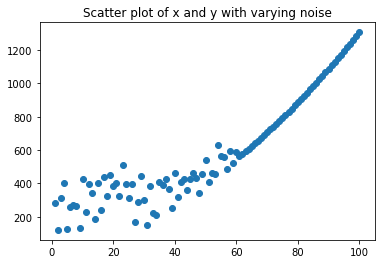

In [34]:
# Question 5 : Advanced noise generation and EMD

x = np.arange(1, 101)
epsilon1 = np.random.uniform(0, 400, size=(30,))
epsilon2 = np.random.normal(40, np.sqrt(5000), size=(30,))

y1 = 0.1*x[:30]**2 + 3*x[:30] + 7 + epsilon1
y2 = 0.1*x[30:60]**2 + 3*x[30:60] + 7 + epsilon2
y3 = 0.1*x[60:]**2 + 3*x[60:] + 7
y = np.concatenate([y1, y2, y3])

plt.scatter(x, y)
plt.title('Scatter plot of x and y with varying noise')

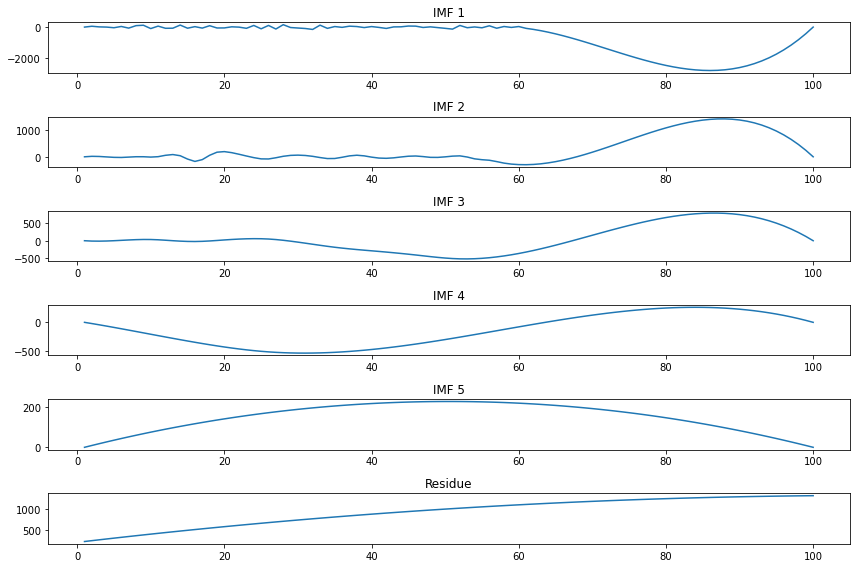

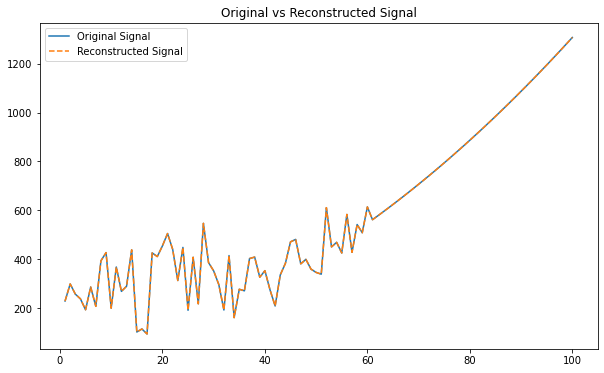

Mean Squared Error of Reconstruction: 2.088146370556227e-27


In [27]:
imfs, residue = iterative_emd(x, y)

plt.figure(figsize=(12, 8))
for i, imf in enumerate(imfs):
    plt.subplot(len(imfs) + 1, 1, i + 1)
    plt.plot(x, imf)
    plt.title(f'IMF {i+1}')
plt.subplot(len(imfs) + 1, 1, len(imfs) + 1)
plt.plot(x, residue)
plt.title('Residue')
plt.tight_layout()
plt.show()

reconstructed_signal = np.sum(imfs, axis=0) + residue

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original Signal')
plt.plot(x, reconstructed_signal, '--', label='Reconstructed Signal')
plt.legend()
plt.title("Original vs Reconstructed Signal")
plt.show()

mse_reconstruction = mean_squared_error(y, reconstructed_signal)
print(f"Mean Squared Error of Reconstruction: {mse_reconstruction}")

### Question 6 Lowess Regression

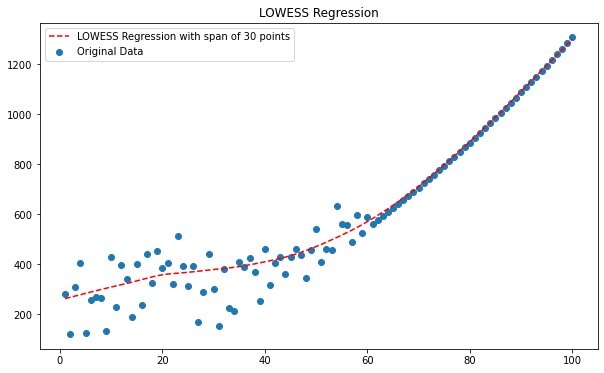

In [40]:
# Question 6: LOWESS regression
from statsmodels.nonparametric.smoothers_lowess import lowess

# Generate synthetic data
np.random.seed(0)

l = [0.1, 0.2, 0.3]

lowess_smoothed = lowess(y, x, frac=0.3, return_sorted=False)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Original Data')
plt.plot(x, lowess_smoothed, 'r--', label='LOWESS Regression with span of 30 points')
plt.legend()
plt.title("LOWESS Regression")
plt.show()
